## **DBSCAN (밀도 기반 데이터 클러스터링 알고리즘)**
* refer
    * https://jhryu1208.github.io/data/2020/12/26/ML_DBSCAN/
    * https://todayisbetterthanyesterday.tistory.com/62

In [ ]:
import pandas as pd
import numpy as np

import mglearn

import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
# %cd '/content/drive/MyDrive/Colab Notebooks/신용카드 사기 거래 탐지 AI'

train_df = pd.read_csv('D:\\2022\\Tobigs\\Dacon\\신용카드 사기거래 탐지 AI 경진대회\\Data\\train.csv')
train_x = train_df.drop(columns = ['ID'])

val_df = pd.read_csv('D:\\2022\\Tobigs\\Dacon\\신용카드 사기거래 탐지 AI 경진대회\\Data\\val.csv',index_col=0)
val_x = val_df.drop(['Class'],axis=1)
val_y = val_df.loc[:,'Class'].copy()

In [ ]:
scaler = StandardScaler()
scaler.fit(train_x)
train_x_scaled = scaler.transform(train_x)

### **DBSCAN Optimization(1)** 
* refer : https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
* eps = 5 / elbow point 참고
* min_samples 는 2*dimension해서 60 
* val f1 score: 0.5122171775177662 (eps 5, min 60)

* eps 정할때 실루엣 score 구하기 
* [4,4.5,5,5.5,6,6.5,7,7.5]

### **DBSCAN Optimization (2)**
* refer : https://medium.com/@mohantysandip/a-step-by-step-approach-to-solve-dbscan-algorithms-by-tuning-its-hyper-parameters-93e693a91289

#### **Import Library**

In [ ]:
from sklearn.neighbors import NearestNeighbors

#### **Caculate the average distance**
* Calculate the distance between each point in the data set
* MinPts Value를 따라서 (2*dim)

In [ ]:
# 8분 소요 
neighbors = NearestNeighbors(n_neighbors=60)
neighbors_fit = neighbors.fit(train_x_scaled)
distances,indices = neighbors_fit.kneighbors(train_x_scaled)

#### **Sort Distance**

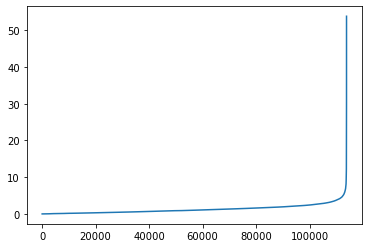

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances) # 미리 보기 

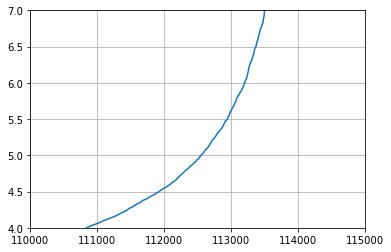

In [ ]:
plt.axis([110000,115000,4,7]) # plt 볼 범위 설정 
plt.grid() # 격자 설정 
plt.plot(distances)

#### **Import Libraries**

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

#### **Find the ideal no.of cluster**
* 이 케이스의 경우 정상 or 사기이므로 2개 
* silhouette_avg 는 0.6479

In [ ]:
# 클러스터 개수 정하기
# 이 케이스의 경우 정상 or 사기이므로 2개 
# silhouette_avg는 0.6479 
clusterer  = KMeans(n_clusters=2, random_state=10)
clusterer_labels = clusterer.fit_predict(val_df)
silhouette_avg = silhouette_score(val_df,clusterer_labels)
print(silhouette_avg)

#### **Choose EPS value with silhoutte score**
* The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [ ]:
# 약 80분 -> 너무 길어서 나눠서 함 (4 - 5.5)
range_eps = [x / 10.0 for x in range(40, 80, 5)]
for i in range_eps:
	print("eps value is "+str(i))
	db = DBSCAN(eps = i, min_samples = 60).fit(train_x_scaled)
	core_samples_mask = np.zeros_like(db.labels_,dtype = bool)
	core_samples_mask[db.core_sample_indices_] = True
	labels = db.labels_
	print(set(labels))
	silhouette_avg = silhouette_score(train_x_scaled, labels)
	print("For eps Value ="+str(i),labels,"The average silhouette_score is :",silhouette_avg)

# eps value is 4.0
# {0, -1}
# For eps Value =4.0 [ 0  0  0 ...  0  0 -1] The average silhouette_score is : 0.45927456920500026
# eps value is 4.5
# {0, -1}
# For eps Value =4.5 [ 0  0  0 ...  0  0 -1] The average silhouette_score is : 0.5278972278923585
# eps value is 5.0
# {0, -1}
# For eps Value =5.0 [ 0  0  0 ...  0  0 -1] The average silhouette_score is : 0.5827894731846893
# eps value is 5.5
# {0, -1}range_eps = [x / 10.0 for x in range(60, 80, 5)]
# For eps Value =5.5 [ 0  0  0 ...  0  0 -1] The average silhouette_score is : 0.6255837664194999
# eps value is 6.0

eps value is 4.0
{0, -1}
For eps Value =4.0 [ 0  0  0 ...  0  0 -1] The average silhouette_score is : 0.45927456920500026
eps value is 4.5
{0, -1}
For eps Value =4.5 [ 0  0  0 ...  0  0 -1] The average silhouette_score is : 0.5278972278923585
eps value is 5.0
{0, -1}
For eps Value =5.0 [ 0  0  0 ...  0  0 -1] The average silhouette_score is : 0.5827894731846893
eps value is 5.5
{0, -1}
For eps Value =5.5 [ 0  0  0 ...  0  0 -1] The average silhouette_score is : 0.6255837664194999
eps value is 6.0


In [ ]:
range_eps = [x / 10.0 for x in range(60, 80, 5)]
for i in range_eps:
	print("eps value is "+str(i))
	db = DBSCAN(eps = i, min_samples = 60).fit(train_x_scaled)
	core_samples_mask = np.zeros_like(db.labels_,dtype = bool)
	core_samples_mask[db.core_sample_indices_] = True
	labels = db.labels_
	print(set(labels))
	silhouette_avg = silhouette_score(train_x_scaled, labels)
	print("For eps Value ="+str(i),labels,"The average silhouette_score is :",silhouette_avg)

eps value is 6.0


### **DBSCAN 돌리기**
* hyperparameter에서 6에 가까운 값이 나옴 (elbow point)
* eps 값을 6으로 설정하여 dbscan 돌리기 
* (추가) elbow point: 

In [ ]:
# 13분 소요 (5)
dbscan = DBSCAN(eps = 5, min_samples=60)
clusters = dbscan.fit_predict(train_x_scaled)

In [ ]:
# 16분 소요 (5.5)
dbscan = DBSCAN(eps = 5.5, min_samples=60)
clusters = dbscan.fit_predict(train_x_scaled)

Text(0, 0.5, '특성 1')

c:\Users\gwons\anaconda3\envs\deeplearning\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\gwons\anaconda3\envs\deeplearning\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


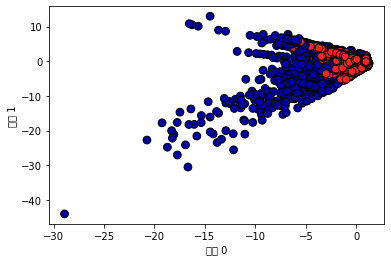

In [ ]:
import mglearn

plt.scatter(train_x_scaled[:, 0], train_x_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [ ]:
def get_pred_label(model_pred):
    model_pred = np.where(model_pred == 0, 0, model_pred) # 정상 
    model_pred = np.where(model_pred == -1,1, model_pred) # 사기

    return model_pred

In [ ]:
scaler = StandardScaler()
scaler.fit(val_x)
val_x_scaled = scaler.transform(val_x)

In [ ]:
from sklearn.metrics import f1_score

val_pred = dbscan.fit_predict(val_x)

In [ ]:
# import numpy as np

# np.set_printoptions(threshold=sys.maxsize)
# print(val_pred)

In [ ]:
import numpy as np 

val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y,val_pred,average='macro')
print(f'Validation F1 Score : [{val_score}]')

Validation F1 Score : [0.5204716716451692]


In [ ]:
test_df = pd.read_csv('D:\\2022\\Tobigs\\Dacon\\신용카드 사기거래 탐지 AI 경진대회\\Data\\test.csv')
test_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


In [ ]:
test_x = test_df.drop(columns=['ID'])

In [ ]:
test_scaled = scaler.fit_transform(test_x)
test_x = pd.DataFrame(test_scaled, columns = test_x.columns, index=list(test_x.index.values))

In [ ]:
test_pred = dbscan.fit_predict(test_x) # model prediction
test_pred = get_pred_label(test_pred)

In [ ]:
submit = pd.read_csv('./sample_submission.csv')
submit.head()

In [ ]:
submit['Class'] = test_pred
submit.to_csv('./submit.csv',index=False)

In [ ]:
submit.head()